In [6]:
import tensorflow
from tensorflow.keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data= cifar100.load_data()


In [17]:
(x_train,y_train),(x_test,y_test)=data

In [18]:
data

((array([[[[255, 255, 255],
           [255, 255, 255],
           [255, 255, 255],
           ...,
           [195, 205, 193],
           [212, 224, 204],
           [182, 194, 167]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [254, 254, 254],
           ...,
           [170, 176, 150],
           [161, 168, 130],
           [146, 154, 113]],
  
          [[255, 255, 255],
           [254, 254, 254],
           [255, 255, 255],
           ...,
           [189, 199, 169],
           [166, 178, 130],
           [121, 133,  87]],
  
          ...,
  
          [[148, 185,  79],
           [142, 182,  57],
           [140, 179,  60],
           ...,
           [ 30,  17,   1],
           [ 65,  62,  15],
           [ 76,  77,  20]],
  
          [[122, 157,  66],
           [120, 155,  58],
           [126, 160,  71],
           ...,
           [ 22,  16,   3],
           [ 97, 112,  56],
           [141, 161,  87]],
  
          [[ 87, 122,  41],
           [ 8

In [19]:
x_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

In [21]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [22]:
x_train.shape

(50000, 32, 32, 3)

In [23]:
y_train.shape

(50000, 1)

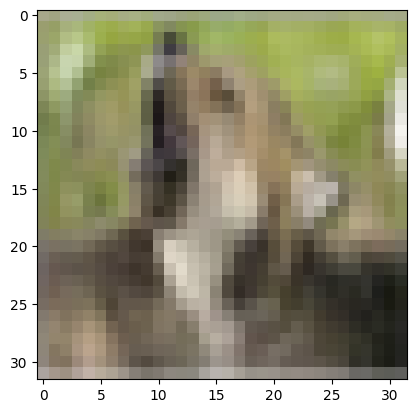

In [25]:
import matplotlib.pyplot as plt
plt.imshow(x_train[17])

In [26]:
from tensorflow.keras.models import Sequential # imports the sequetial model
from tensorflow.keras.layers import Dense,Flatten #  import the flatten and dense layers, (image to numerical),bulding block of neural networks
from tensorflow.keras.optimizers import Adam # import the adam optimizer used to update the models weight during training
from tensorflow.keras.losses import SparseCategoricalCrossentropy # import the loss function used to measure the difference b/w actual value and model prediction.

In [32]:
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(600,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='softmax'))

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
perform_model=model.fit(x_train,y_train,epochs=5 ,validation_data=(x_test,y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - accuracy: 0.0091 - loss: 16.7396 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.0099 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.0092 - loss: 4.6057 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.0093 - loss: 4.6056 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.0094 - loss: 4.6057 - val_accuracy: 0.0100 - val_loss: 4.6052


In [35]:
perform_model.history

{'accuracy': [0.008580000139772892,
  0.008980000391602516,
  0.009080000221729279,
  0.009039999917149544,
  0.008799999952316284],
 'loss': [6.783862590789795,
  4.605909824371338,
  4.6059417724609375,
  4.605929374694824,
  4.605949401855469],
 'val_accuracy': [0.009999999776482582,
  0.009999999776482582,
  0.009999999776482582,
  0.009999999776482582,
  0.009999999776482582],
 'val_loss': [4.605202674865723,
  4.6052021980285645,
  4.605189323425293,
  4.605192184448242,
  4.605189800262451]}

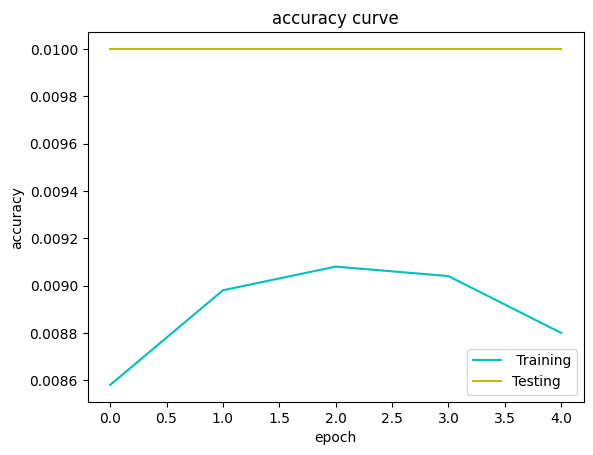

In [36]:
import matplotlib.pyplot as plt
plt.plot(perform_model.history['accuracy'],color='c',label=' Training')
plt.plot(perform_model.history['val_accuracy'],color='y', label='Testing')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy curve')
plt.show()